<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_07_derivadas.pynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 7
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods

El potencial eléctrico de un anillo de radio R, en la parte superior z del anillo viene dado por: 


\begin{equation}
V = \frac{kq_{tot}z}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para z>0 y R=0.1mm. Reescale el problema en unidades de $kq_{top}$ empleando:

1. La librearia sympy.

2. Calcular el campo en el punto  $z = 0.1mm$ empleando el metodo [misc.derivative](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html)

3. Calcular el campo para diferentes valores de z con z>0,,  empleando misc derivative. Construya un grafico de E vs z.

4. Entender la generalizacion de la siguiente función, y aplicarla para calcular la derivada.


```python
import numpy as np
from scipy import misc
def derivative(func,x0,**kwargs):
    '''
    Vectorized replacement of scipy.misc derivative:
        from scipy.misc import derivative
    For usage check the derivative help, e.g, in jupyter: 
        from scipy.misc import derivative
        derivative?
    '''
    try:
        #x0: can be an array or a list  
        nn=np.asarray(x0).shape[0] ## force error if float is used 
        fp=np.vectorize(misc.derivative)
    except IndexError:
        fp=misc.derivative
        
    return fp(func,x0,**kwargs)

assert isinstance(derivative(np.sin,1,dx=1E-6),float)

```

Primer Punto

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

In [ ]:
#Definamos la función para el potencial
z = sp.Symbol('z')
R = sp.Symbol('R')
potencial = lambda z, R: z/(sp.sqrt(z**2 + R**2))
campoElectrico = -sp.diff(potencial(z,R),z)
campoElectrico

z**2/(R**2 + z**2)**(3/2) - 1/sqrt(R**2 + z**2)

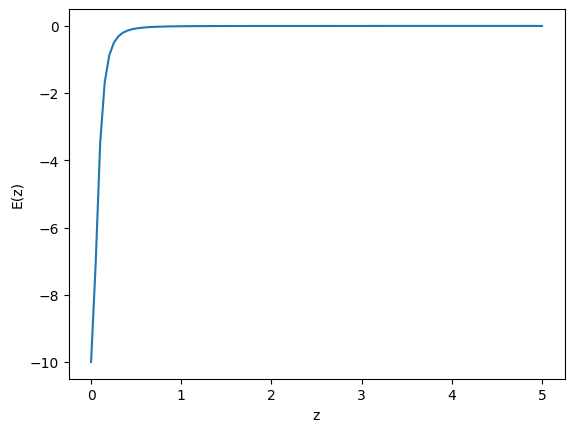

In [ ]:
#La llevamos a numpy para poder evaluar
campoNumpy = sp.lambdify((z,R),campoElectrico,'numpy')
X = 0.1
zz = np.linspace(0.00001,5,100)
y = campoNumpy(zz,X)
plt.plot(zz,y);
plt.xlabel('z')
plt.ylabel('E(z)');

Segundo Punto

In [ ]:
#Ahora lo vamos a hacer con misc
RR = np.linspace(0,1,10)
potencial1 = lambda zz, RR=0.1: zz/(np.sqrt(zz**2 + RR**2))
misc.derivative(potencial1,0.1,dx=1,args=(RR,))

<ipython-input-4-ce621accad44>:4: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  misc.derivative(potencial1,0.1,dx=1,args=(RR,))


array([1.        , 0.99370121, 0.97552073, 0.94738658, 0.91190471,
       0.87177638, 0.82937751, 0.7865617 , 0.74463924, 0.7044524 ])

In [ ]:
#Ahora hallemos la derivada para cada uno de los puntos
dominio = np.linspace(0,2,100)
funcionVectorizada = np.vectorize(misc.derivative)
campo = -funcionVectorizada(potencial1,dominio,args=(RR,))

In [ ]:
from scipy.misc import derivative
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def potencial (z,R,kq=1.0):
  V = z*kq/np.sqrt(z**2+R**2)
  return V

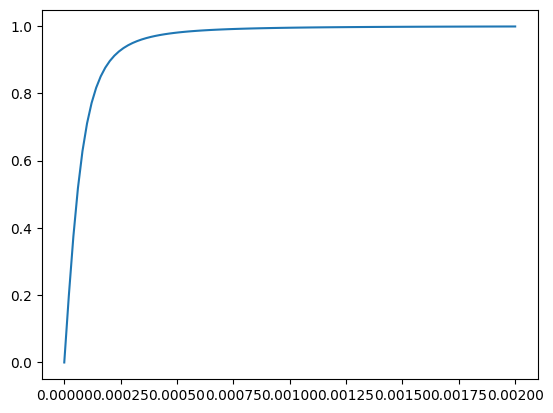

In [ ]:
z = np.linspace(0,0.002,100)
R = 0.1E-3
plt.plot(z,potencial(z,R))

<ipython-input-33-a0b302049547>:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  gradiente = derivative(potencial,z,dx=1E-6,args=(R,))


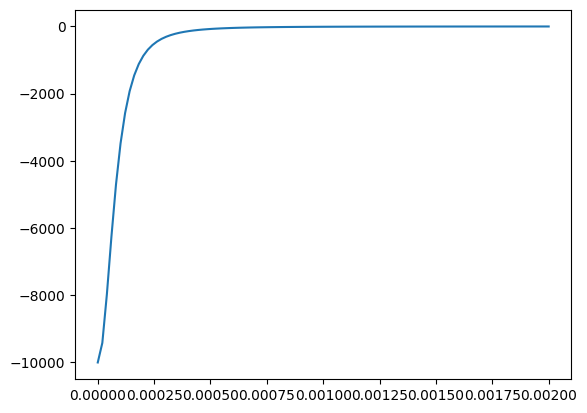

In [ ]:
z = np.linspace(0,0.002,100)
R = 0.1E-3
gradiente = derivative(potencial,z,dx=1E-6,args=(R,))
campoElectrico = -gradiente
plt.plot(z,campoElectrico);

In [ ]:
#Vectoricemos la función
def potencial (z,R,kq,select):
  if (select=='anillo'): #Vectorize nos permite evaluar el if para un array
    V = z*kq/np.sqrt(z**2+R**2)
  elif(select=='disco'):
    V = (2*kq/R**2)**(np.sqrt(z**2 + R**2)-z)
  else:
    print('error: seleccione anillo o disco')
  return V

z = np.linspace(0,0.002,100)
R = 0.1E-3
kq = 1
derivative1 = np.vectorize(derivative,excluded =['args'] ) #Parámetros adicionales diferentes de z
gradiente1 = derivative1(potencial,z,dx=1E-6, args=(R,kq))
campoElectrico1 = -gradiente1
plt.plot(z,campoElectrico1)

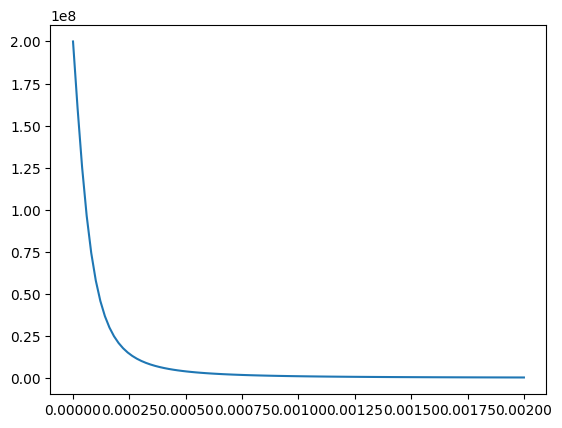

In [ ]:
#Vectoricemos la función
def potencial (z,R,kq,select):
  if (select=='anillo'): #Vectorize nos permite evaluar el if para un array
    V = z*kq/np.sqrt(z**2+R**2)
  elif(select=='disco'):
    V = (2*kq/R**2)*(np.sqrt(z**2 + R**2)-z)
  else:
    print('error: seleccione anillo o disco')
    V = None
  return V
#potencial(z,R,kq,'disco')
try:
  gradiente3 = derivative1(potencial,z,dx=1e-6,args=(R,kq,'disco'))
  campoDisco = -gradiente3
except:
  print('Error: anillo o disco')
plt.plot(z,campoDisco)

In [ ]:
#Convirtamos esto en un programa ejecutable
import numpy as np
from scipy.misc import derivative
z = np.linspace(0,0.002,100)
R = 0.1E-3
select = 'anillo'
def potencial (z,R,kq,select):
  if (select=='anillo'): #Vectorize nos permite evaluar el if para un array
    V = z*kq/np.sqrt(z**2+R**2)
  elif(select=='disco'):
    V = (2*kq/R**2)*(np.sqrt(z**2 + R**2)-z)
  else:
    print('error: seleccione anillo o disco')
    V = None
  return V
#potencial(z,R,kq,'disco')
try:
  derivative1 = np.vectorize(derivative,excluded =['args'] ) #Parámetros adicionales diferentes de z
  gradiente3 = derivative1(potencial,z,dx=1e-6,args=(R,kq,'disco'))
  campoElectrico = -gradiente3
  np.savetxt('campo_electrico.txt',campoElectrico)
except:
  print('Error: anillo o disco')